---

<center> <h1> <span style='color:#292D78'> Project:01 Density Log Prediction by Neural Networks </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> XYZ_Well in WCSB </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will predict the ** Density log ** using Neural Networks.

# Density Log

### Context

In some areas porosity calculatio from density log is more reliable as compare to sonic logs beacuse of presence of bitumen. Density log is highly sensitive to the bore hole conditions. This excercise helps to calculte the Density log in the reservoir zone where Density reading is not accurate due to enlarged hole.
### Objective

Analyze the dataset, identify which log impacts more in the pprediction of Density log.
Train and test a Neural Networks model, XGbooster & Gradient boosting methods to predict density log.

### Content

You are provided with following.

> xyz_U_montney well.csv

* **DEPT**: Depth of the Formations
* **CALI**: Caliper log
* **BS **: Bit size
* **hole enlarged**: hole size
* **GR**: Gamma Ray
* **NPHS**: Neutron porosity
* **PE**: Photoelectric Effect
* **RT20**: Resistivity
* **RT30 **: Resistivity
* **RT60**: Resistivity
* **RXO**: Resistivity of the flushed Zone
* **RT10**: Resistivity
* **RHOB (kg/m3) **: Bilk density of the formation


Loading packages:

In [1]:
# Core
import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

!pip install -U scikit-learn

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, plot_importance

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

Reading well data from comma seprated file(CSV):

In [452]:
data = pd.read_csv("xyz_U_montney well.csv")
print(data.shape)
data

(1111, 14)


DEPT       CALI   BS  hole enlarged         GR     NPHS       PE  \
0    3039.000000 223.705200  222       1.710000  89.603400 0.077000 3.091800   
1    3039.100000 223.680100  222       1.680000  88.689900 0.075100 3.016200   
2    3039.200000 223.582900  222       1.580000  85.367800 0.072600 3.019700   
3    3039.300000 223.621600  222       1.620000  86.129000 0.072900 3.070200   
4    3039.400000 223.410900  222       1.410000  87.756900 0.071300 3.109800   
...          ...        ...  ...            ...        ...      ...      ...   
1106 3149.600000 221.704000  222      -0.300000  98.340000 0.101900 3.532400   
1107 3149.700000 221.782700  222      -0.220000 101.623100 0.102900 3.490100   
1108 3149.800000 221.845600  222      -0.150000 102.298500 0.103300 3.457800   
1109 3149.900000 221.813400  222      -0.190000 100.128000 0.101000 3.429000   
1110 3150.000000 221.767200  222      -0.230000  97.176700 0.101700 3.404700   

          RT20      RT30      RT60      RT90        RXO       RT10  \
0    29.338100 29.176900 28.890000 28.870800  29.807200  29.807200   
1    31.860100 31.654400 31.337200 31.318600  32.348500  32.348500   
2    39.661800 39.306500 38.900500 38.893900  40.233000  40.233000   
3    43.996600 43.541200 43.107700 43.122000  44.600600  44.600600   
4    47.820500 47.265200 46.842500 46.892100  48.421600  48.421600   
...        ...       ...       ...       ...        ...        ...   
1106 92.221800 87.303500 84.798200 89.770600 100.936700 100.676900   
1107 90.951100 86.168900 83.676500 88.486500  99.401000  99.202000   
1108 90.189000 85.482600 82.995400 87.708800  98.538400  98.310000   
1109 89.601500 84.947800 82.451800 87.082200  97.897800  97.631400   
1110 89.089700 84.458400 81.897400 86.411900  97.428400  97.109800   

      RHOB (kg/m3)  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
1106   2652.647000  
1107   2656.942900  
1108   2653.226300  
1109   2646.453100  
1110   2639.446800  

[1111 rows x 14 columns]

In [453]:
data["Bulk_Density_gm/cm3"] = 0.001 * data["RHOB (kg/m3)"]
data

DEPT       CALI   BS  hole enlarged         GR     NPHS       PE  \
0    3039.000000 223.705200  222       1.710000  89.603400 0.077000 3.091800   
1    3039.100000 223.680100  222       1.680000  88.689900 0.075100 3.016200   
2    3039.200000 223.582900  222       1.580000  85.367800 0.072600 3.019700   
3    3039.300000 223.621600  222       1.620000  86.129000 0.072900 3.070200   
4    3039.400000 223.410900  222       1.410000  87.756900 0.071300 3.109800   
...          ...        ...  ...            ...        ...      ...      ...   
1106 3149.600000 221.704000  222      -0.300000  98.340000 0.101900 3.532400   
1107 3149.700000 221.782700  222      -0.220000 101.623100 0.102900 3.490100   
1108 3149.800000 221.845600  222      -0.150000 102.298500 0.103300 3.457800   
1109 3149.900000 221.813400  222      -0.190000 100.128000 0.101000 3.429000   
1110 3150.000000 221.767200  222      -0.230000  97.176700 0.101700 3.404700   

          RT20      RT30      RT60      RT90        RXO       RT10  \
0    29.338100 29.176900 28.890000 28.870800  29.807200  29.807200   
1    31.860100 31.654400 31.337200 31.318600  32.348500  32.348500   
2    39.661800 39.306500 38.900500 38.893900  40.233000  40.233000   
3    43.996600 43.541200 43.107700 43.122000  44.600600  44.600600   
4    47.820500 47.265200 46.842500 46.892100  48.421600  48.421600   
...        ...       ...       ...       ...        ...        ...   
1106 92.221800 87.303500 84.798200 89.770600 100.936700 100.676900   
1107 90.951100 86.168900 83.676500 88.486500  99.401000  99.202000   
1108 90.189000 85.482600 82.995400 87.708800  98.538400  98.310000   
1109 89.601500 84.947800 82.451800 87.082200  97.897800  97.631400   
1110 89.089700 84.458400 81.897400 86.411900  97.428400  97.109800   

      RHOB (kg/m3)  Bulk_Density_gm/cm3  
0              NaN                  NaN  
1              NaN                  NaN  
2              NaN                  NaN  
3              NaN                  NaN  
4              NaN                  NaN  
...            ...                  ...  
1106   2652.647000             2.652647  
1107   2656.942900             2.656943  
1108   2653.226300             2.653226  
1109   2646.453100             2.646453  
1110   2639.446800             2.639447  

[1111 rows x 15 columns]

The data contains $1111$ rows and $14$ columns.

Checking data types:

In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DEPT                 1111 non-null   float64
 1   CALI                 1111 non-null   float64
 2   BS                   1111 non-null   int64  
 3   hole enlarged        1111 non-null   float64
 4   GR                   1111 non-null   float64
 5   NPHS                 1111 non-null   float64
 6   PE                   1111 non-null   float64
 7   RT20                 1111 non-null   float64
 8   RT30                 1111 non-null   float64
 9   RT60                 1111 non-null   float64
 10  RT90                 1111 non-null   float64
 11  RXO                  1111 non-null   float64
 12  RT10                 1111 non-null   float64
 13  RHOB (kg/m3)         984 non-null    float64
 14  Bulk_Density_gm/cm3  984 non-null    float64
dtypes: float64(14), int64(1)
memory usage:

* Most of the data is float dtype
*Bit size is int

In [455]:
data.nunique()

DEPT                   1111
CALI                   1070
BS                        1
hole enlarged           244
GR                     1048
NPHS                    444
PE                      998
RT20                   1111
RT30                   1110
RT60                   1111
RT90                   1110
RXO                    1110
RT10                   1109
RHOB (kg/m3)            984
Bulk_Density_gm/cm3     984
dtype: int64

Checking for duplicates:

In [456]:
data.duplicated().sum()

0

There are not duplicated rows.

Checking again for missing:

In [457]:
data.isna().sum()

DEPT                     0
CALI                     0
BS                       0
hole enlarged            0
GR                       0
NPHS                     0
PE                       0
RT20                     0
RT30                     0
RT60                     0
RT90                     0
RXO                      0
RT10                     0
RHOB (kg/m3)           127
Bulk_Density_gm/cm3    127
dtype: int64

127 rows in that data have no RHOB(kg/m3).

Let's drop the columns `DEPT`, `CALI`, `BS`, `hole enlarged`, `RXO` as we won't be using them:

In [458]:
data.describe().T

count        mean       std         min         25%  \
DEPT                1111.000000 3094.500000 32.086238 3039.000000 3066.750000   
CALI                1111.000000  222.024000  0.618662  219.882600  221.634150   
BS                  1111.000000  222.000000  0.000000  222.000000  222.000000   
hole enlarged       1111.000000    0.024014  0.618748   -2.120000   -0.370000   
GR                  1111.000000   90.508480 10.378733   60.863800   83.773100   
NPHS                1111.000000    0.085821  0.012663    0.055000    0.076650   
PE                  1111.000000    3.190739  0.169380    2.661600    3.078950   
RT20                1111.000000   64.888850 27.958158   10.609100   45.312900   
RT30                1111.000000   61.995539 26.025880   10.506800   44.215800   
RT60                1111.000000   60.406513 25.390798   10.547500   43.252150   
RT90                1111.000000   62.330347 27.526401   10.266400   43.266050   
RXO                 1111.000000   71.535179 34.312626   10.975400   47.111700   
RT10                1111.000000   69.733045 31.742760   10.959700   46.949100   
RHOB (kg/m3)         984.000000 2651.207385 29.447625 2571.699500 2632.775600   
Bulk_Density_gm/cm3  984.000000    2.651207  0.029448    2.571700    2.632776   

                            50%         75%         max  
DEPT                3094.500000 3122.250000 3150.000000  
CALI                 221.961200  222.274500  224.850800  
BS                   222.000000  222.000000  222.000000  
hole enlarged         -0.040000    0.275000    2.850000  
GR                    90.973600   97.178650  125.467400  
NPHS                   0.085900    0.094650    0.116300  
PE                     3.185300    3.290950    3.811400  
RT20                  61.411500   81.885100  183.185500  
RT30                  58.343900   77.993500  172.158200  
RT60                  56.712300   75.899550  175.969200  
RT90                  58.473300   79.475600  194.238300  
RXO                   64.802500   91.590000  234.887300  
RT10                  64.542100   89.505400  203.226400  
RHOB (kg/m3)        2649.629800 2672.887725 2730.337600  
Bulk_Density_gm/cm3    2.649630    2.672888    2.730338

* most of the data looks normally distributed
* Resistivity logs (RT10, RT20, RT30, RT60, RT90) look right skewed
* RHOM(kg/m3) looks bit left skewed

## Exploratory Data Analysis (EDA)

## Univariate Analysis

### Numeric Features

Let's check the distribution of the numeric columns.

In [459]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data, x = feature, ax = ax_hist) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color = "green") # mean
    ax_hist.axvline(data[feature].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

In [460]:
# Get numerical columns:
cols_num = list(data.select_dtypes(include = ["int64", "float64"]))

print(cols_num)

['DEPT', 'CALI', 'BS', 'hole enlarged', 'GR', 'NPHS', 'PE', 'RT20', 'RT30', 'RT60', 'RT90', 'RXO', 'RT10', 'RHOB (kg/m3)', 'Bulk_Density_gm/cm3']


Now let's plot all the numerical columns using a for loop:

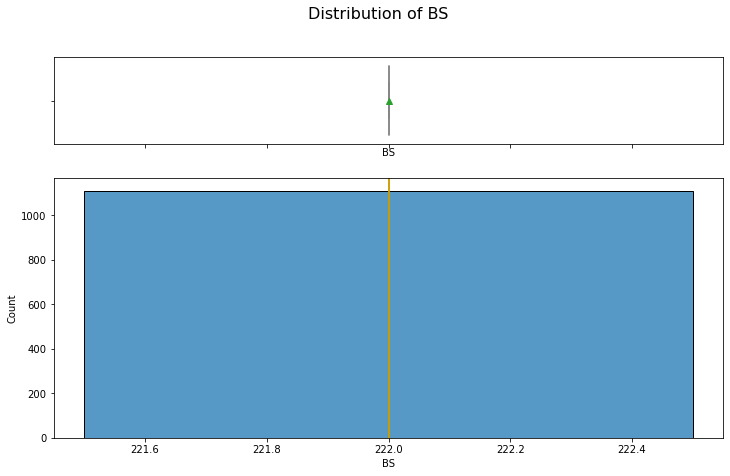

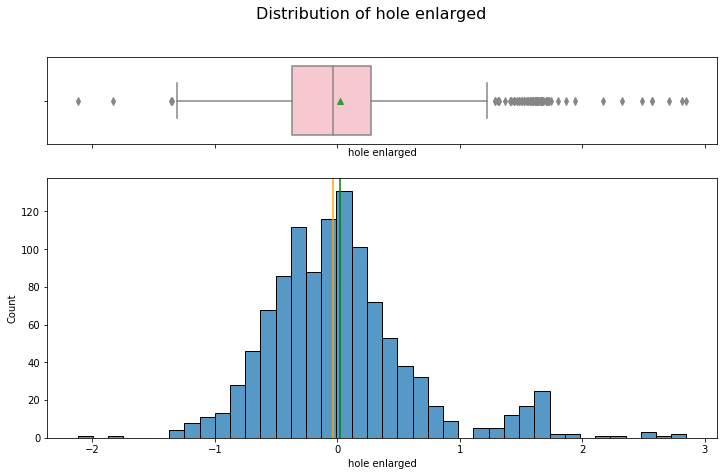

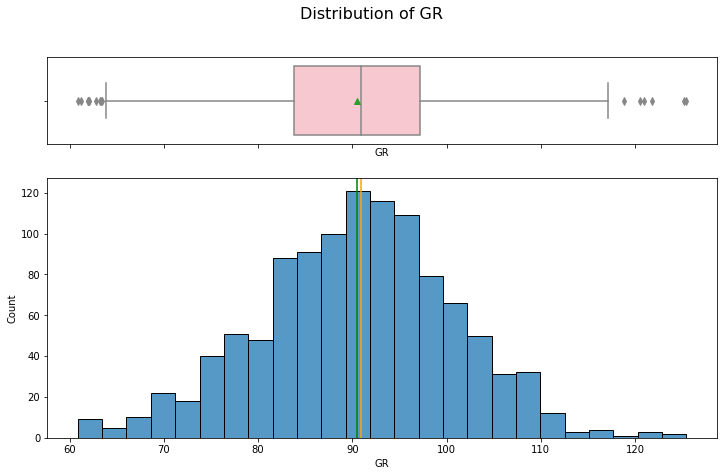

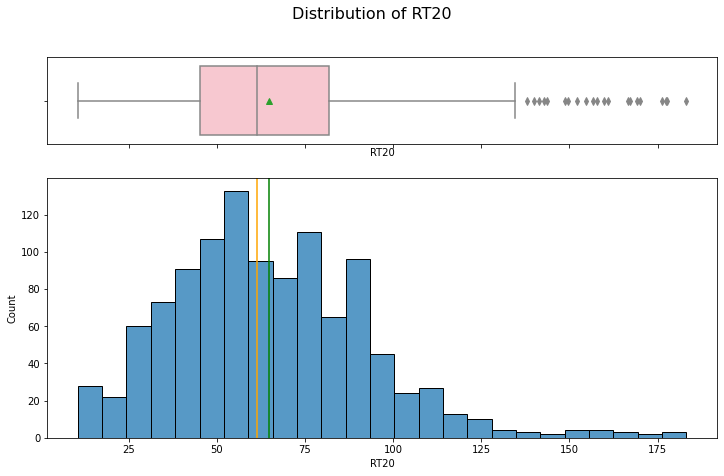

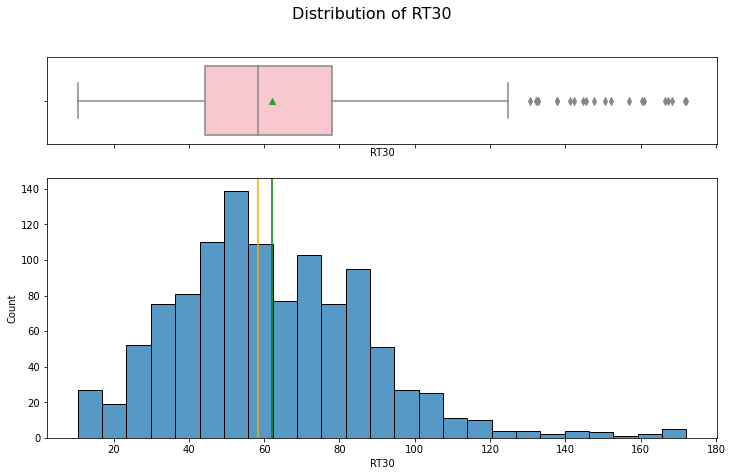

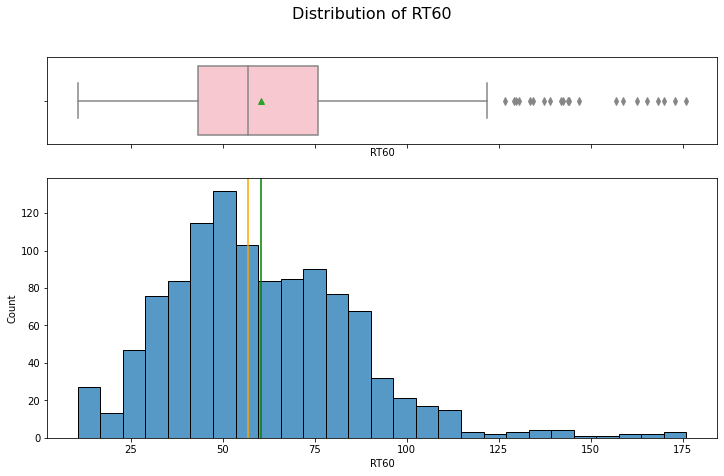

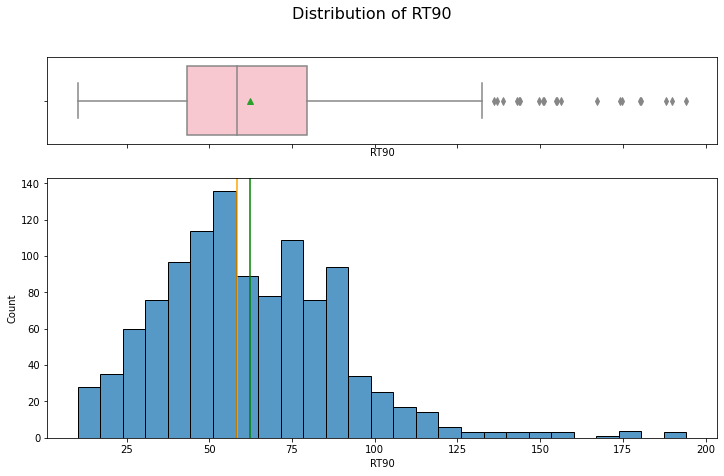

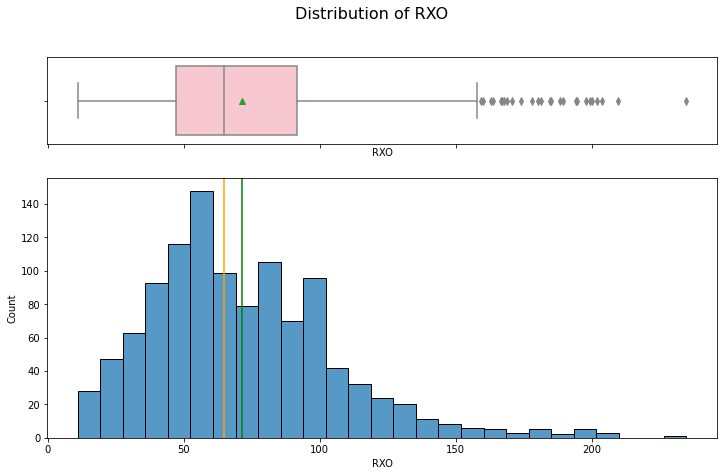

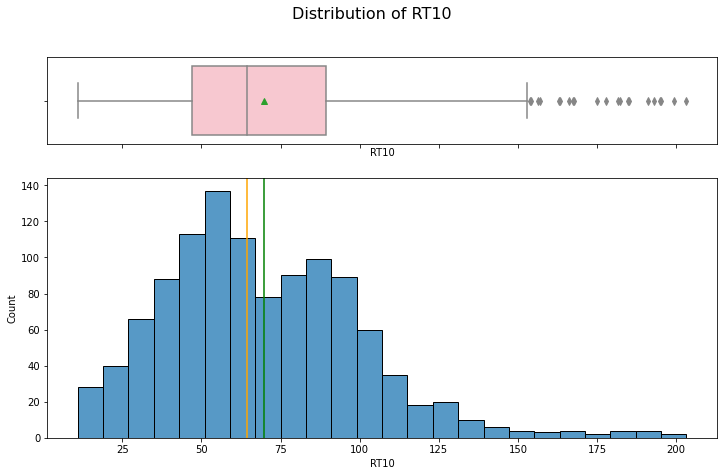

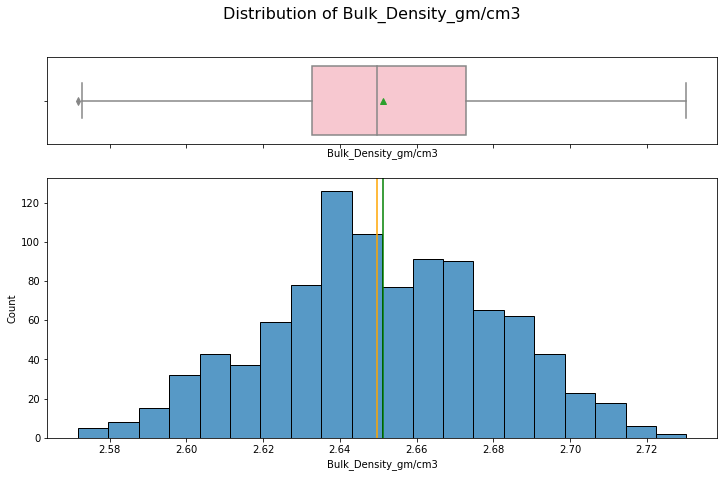

In [461]:
for i in cols_num:
    hist_box(data, i)

* `GR` has binomial distribution.
* Most of the resistivity distributions are right skewed.

## Bivariate Analysis

### Numerical vs RHOB

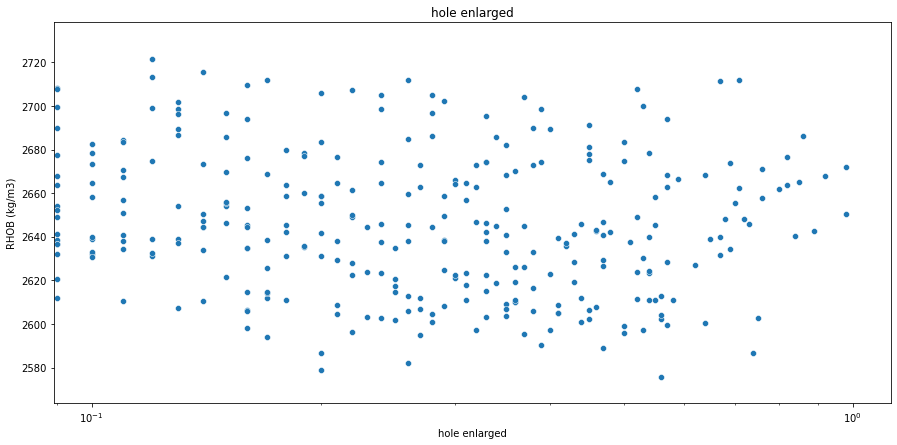

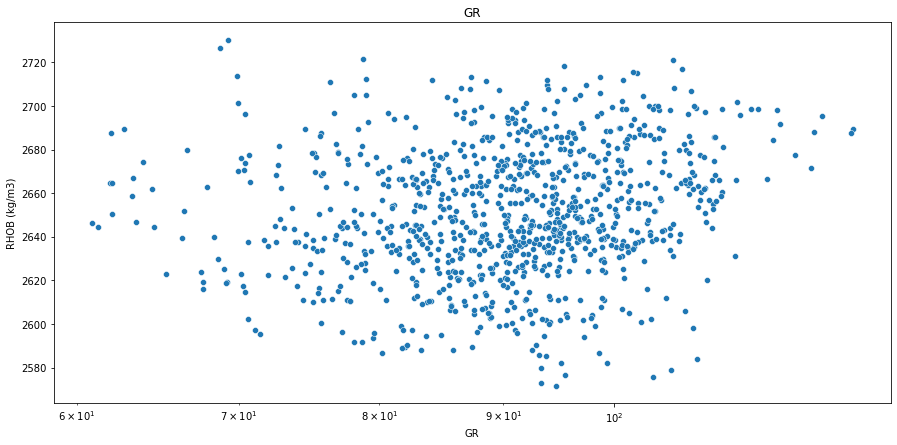

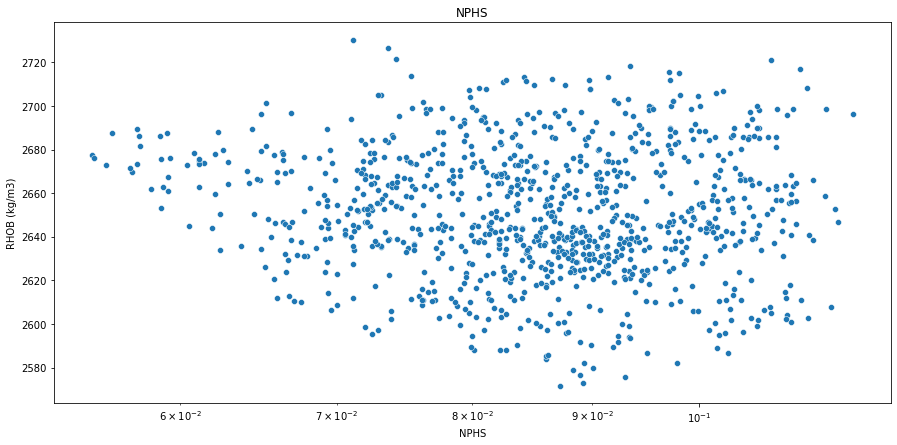

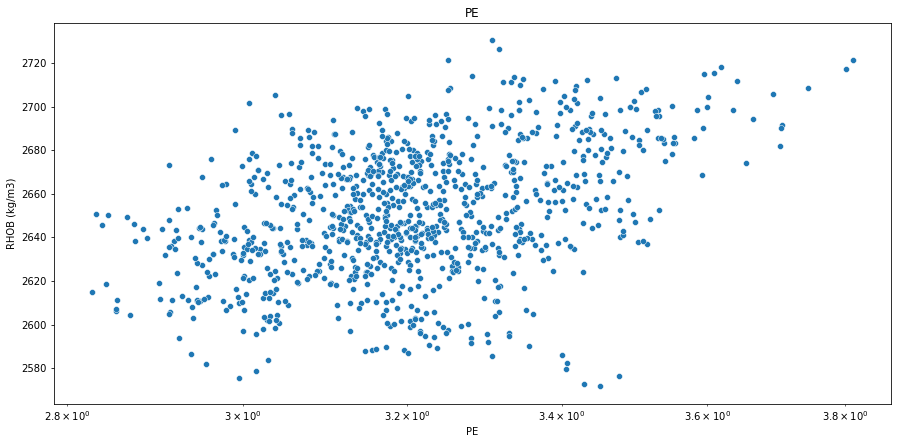

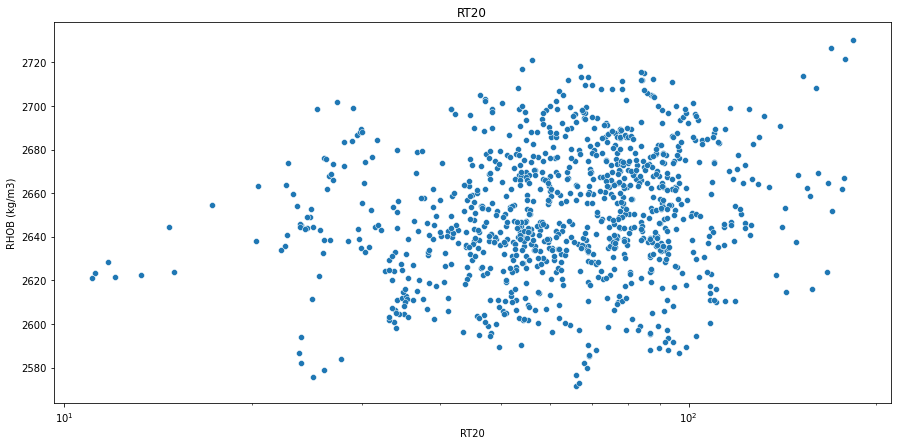

In [463]:
for i in cols_num[3:8]:
    plt.figure(figsize = (15, 7))
    a = sns.scatterplot(data = data, x = i, y = "RHOB (kg/m3)")
    plt.title(i)
    a.set_xscale("log")
    plt.show()

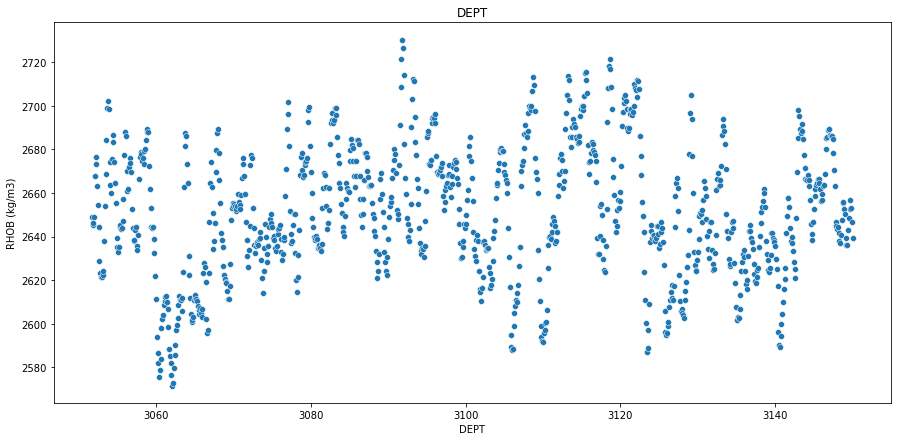

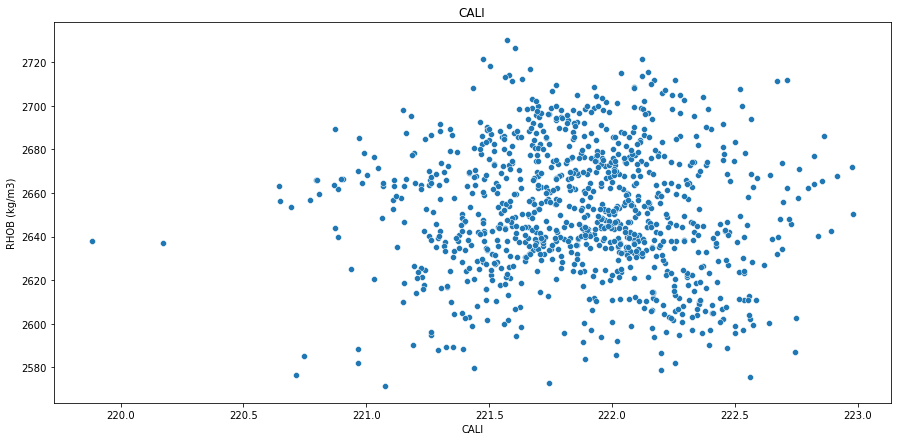

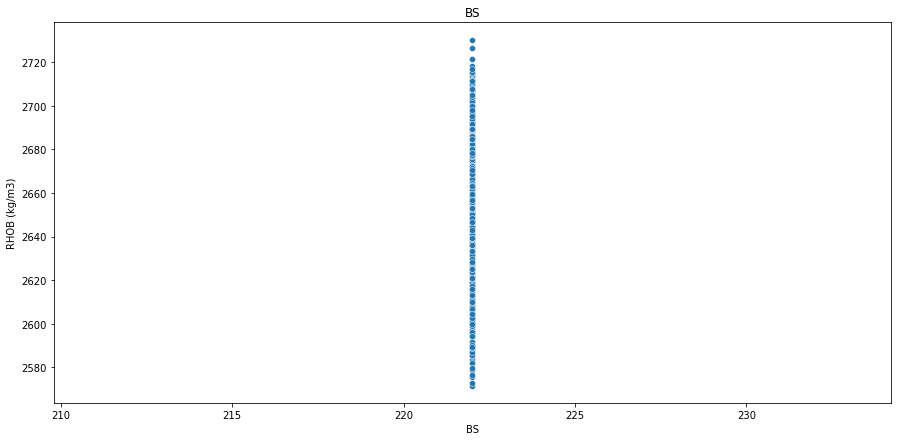

In [464]:
for i in cols_num[0:3]:
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data, x = i, y = "RHOB (kg/m3)")
    plt.title(i)
    plt.show()

* `price` seems to have a posite correlation with almost all the numerical variables, except for `floors`, `sqft_lot`, and `sqft_lot15`.
* Location (`lat`, `long`) also have an influency in the price of the houses.
* `sqft_lot` and `sqft_lot15` seem to have a non-linear relationship with price. A linear model will hardly capture their correlation.

## Multivariate Analysis

### Correlation Plot

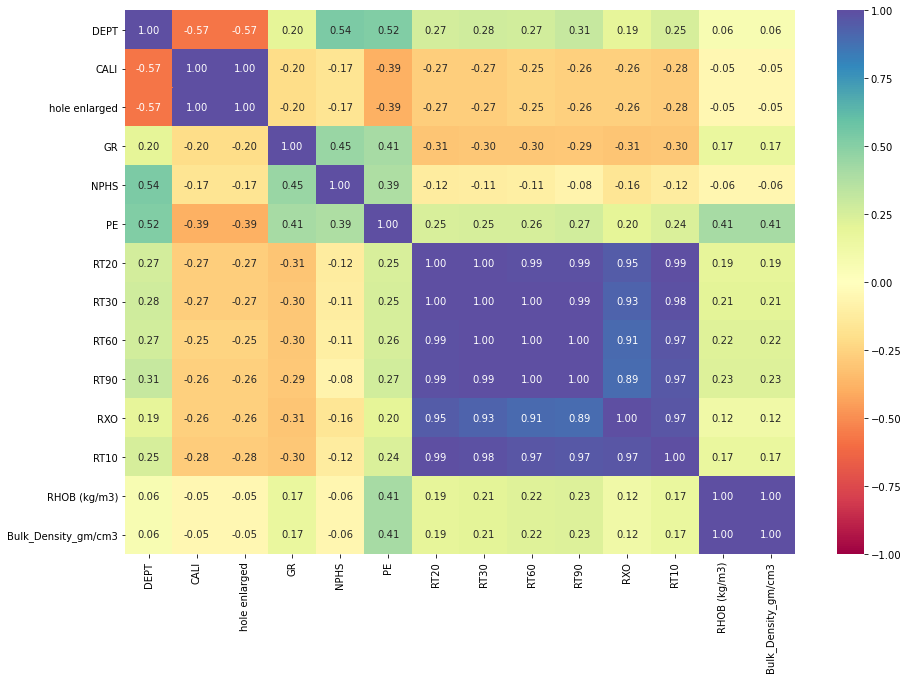

In [467]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.drop("BS",axis=1).corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

* `resistvity logs` has a relative high positive correlation among themselves.
* RHOB(kg/m3) have better correlation with PE  & GR as compare to the remaing logs.


### Pair Plot

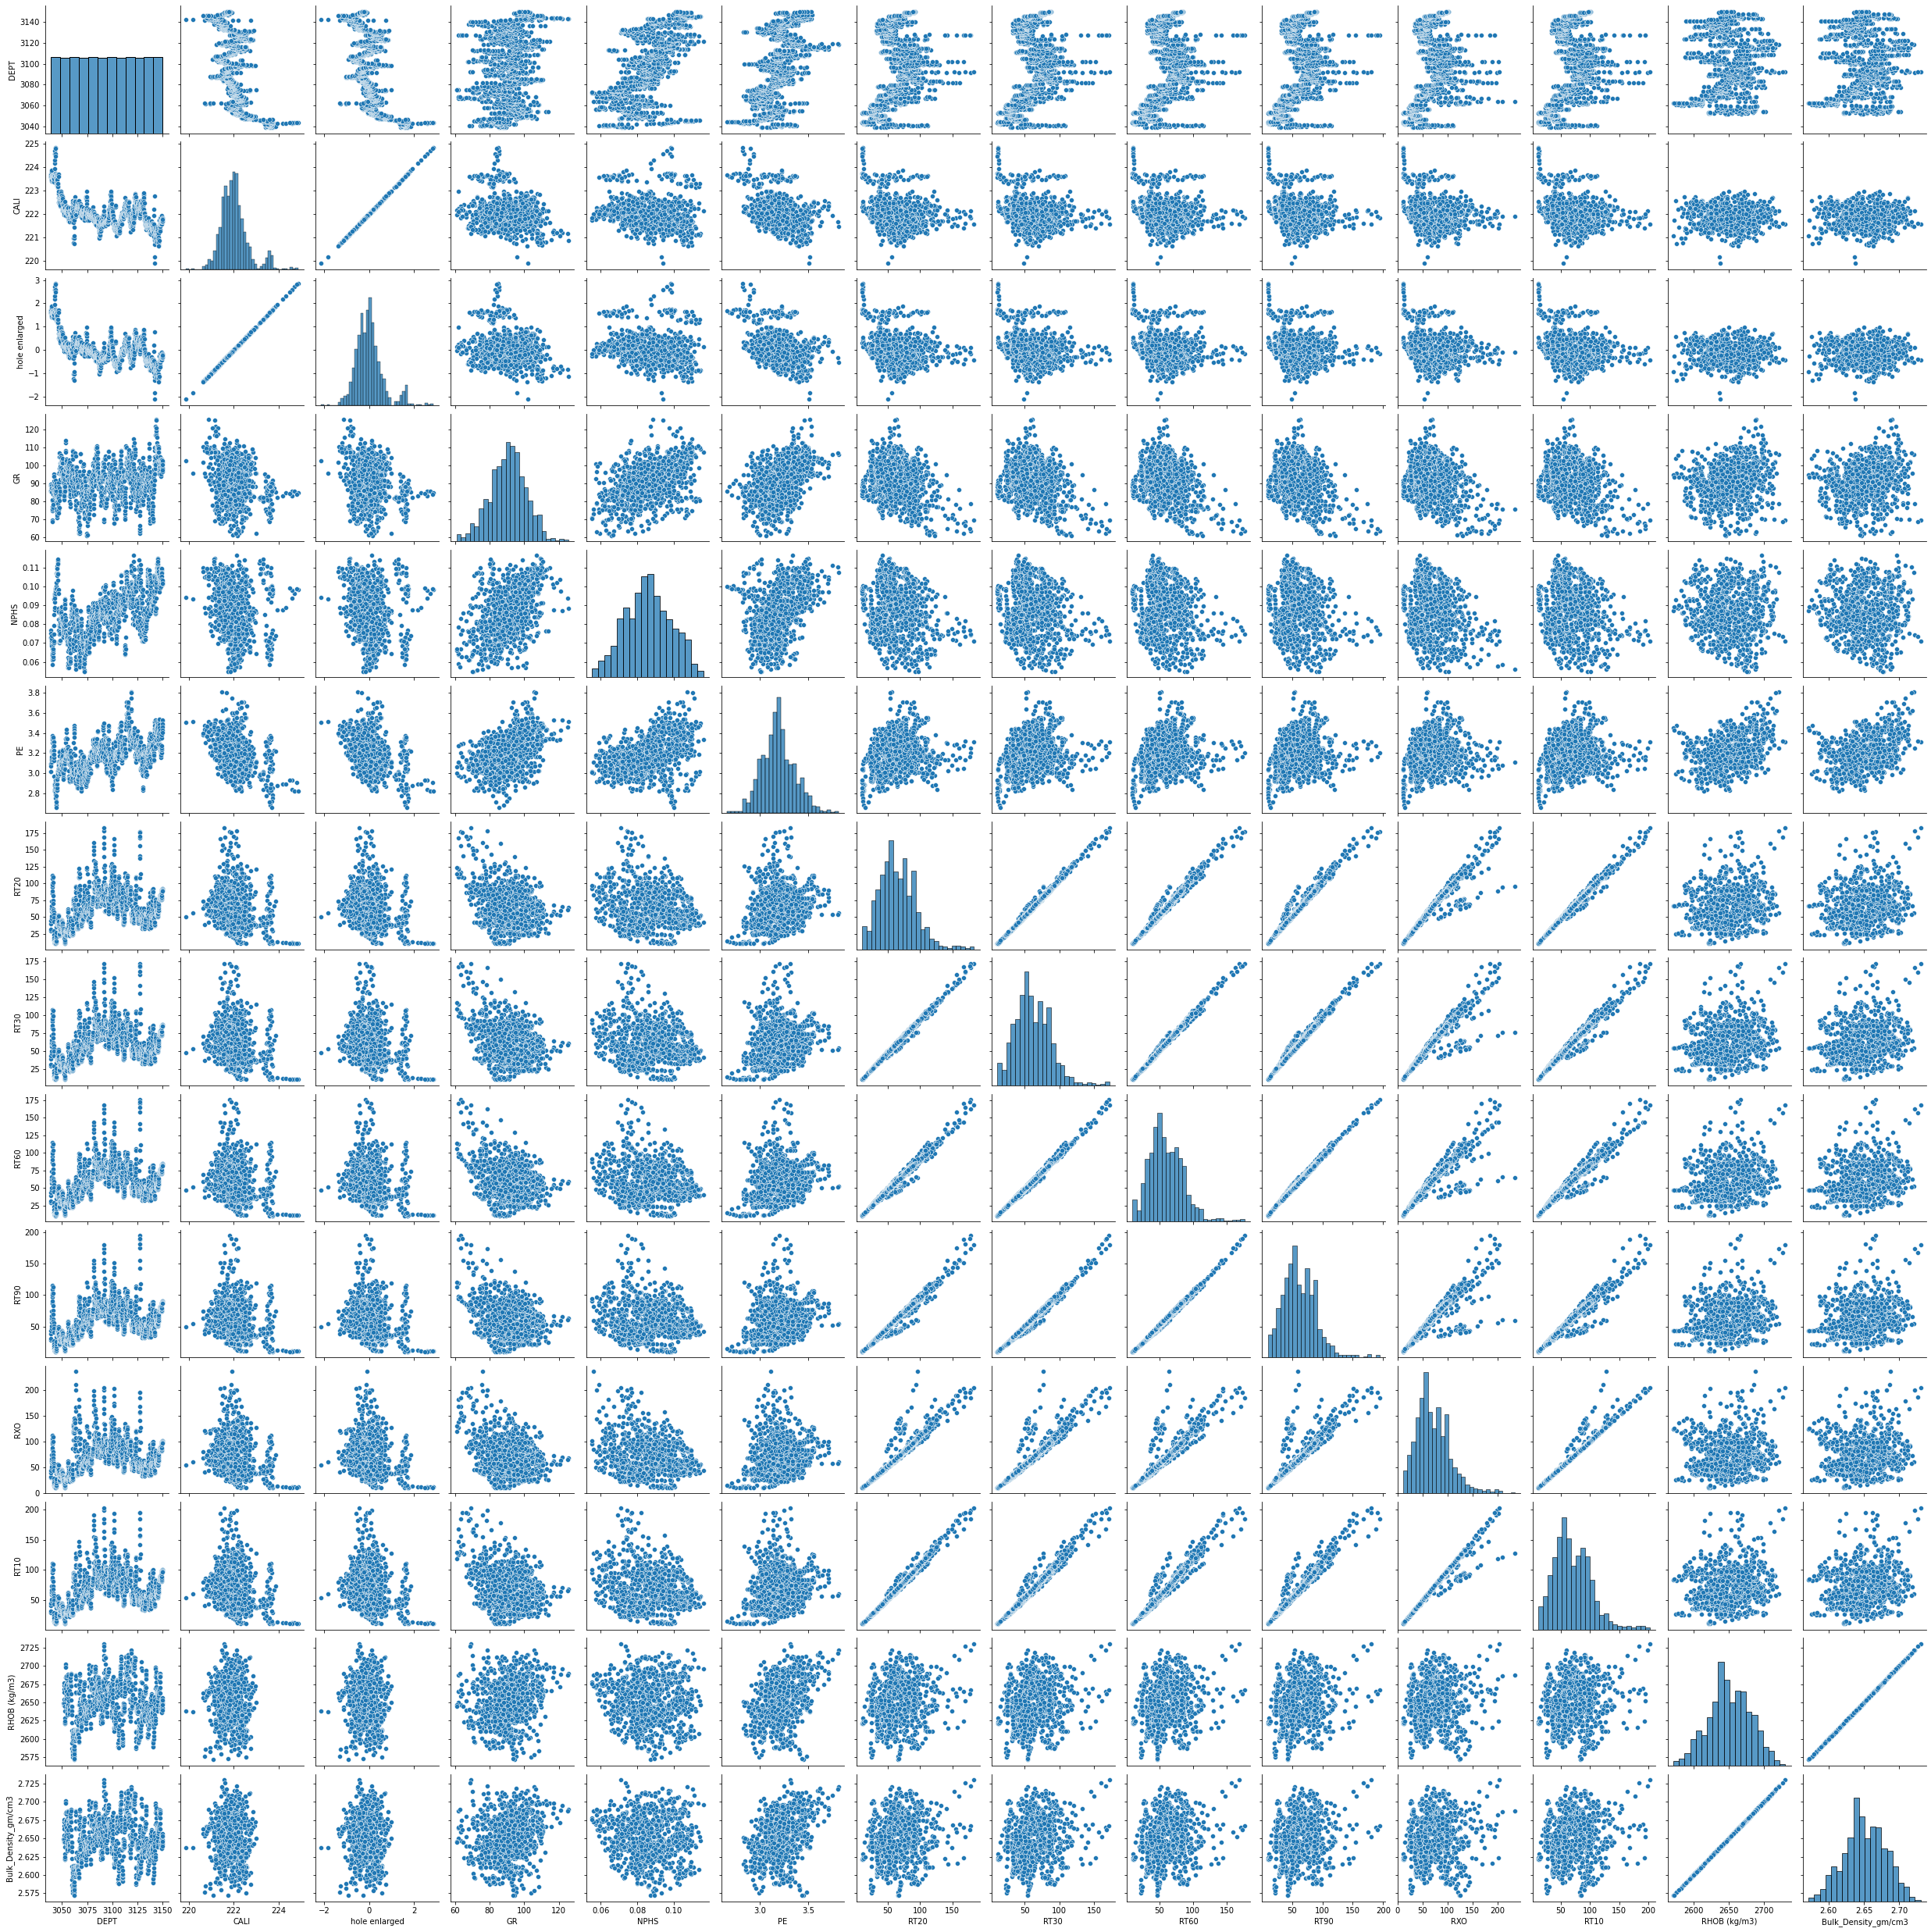

In [469]:
sns.pairplot(data = data.drop("BS",axis=1));

Similar interpretation as the correlation plot.

## Data Transformation

In [470]:
features = list(data.drop(["RHOB (kg/m3)", "DEPT", "CALI", "BS","hole enlarged", "Bulk_Density_gm/cm3", 'RT20', 'RT30', 'RT60',  'RXO', 'RT10', 'NPHS'], axis = 1))
target = "Bulk_Density_gm/cm3"
print(features)

['GR', 'PE', 'RT90']


## Splitting the data into train and test

In [471]:
train, test = train_test_split(data.iloc[129:1111, :], test_size = 0.2, random_state = 10)

print(train.shape[0], test.shape[0])

785 197


### MinMaxScaler()



In [473]:
# Reseting indexes
train.reset_index(inplace = True)
test.reset_index(inplace = True)
data.reset_index(inplace = True)

# Saving the grades
temp1 = train["Bulk_Density_gm/cm3"]
temp2 = test["Bulk_Density_gm/cm3"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_scaler = scaler.fit_transform(train.drop("Bulk_Density_gm/cm3", axis = 1))
test_scaler = scaler.fit_transform(test.drop("Bulk_Density_gm/cm3", axis = 1))
data_scaler = scaler.fit_transform(data.drop("Bulk_Density_gm/cm3", axis = 1))

#train = pd.DataFrame(train)
train = pd.DataFrame(train_scaler, columns = scaler.feature_names_in_)
test = pd.DataFrame(test_scaler, columns = scaler.feature_names_in_)
data = pd.DataFrame(data_scaler, columns = scaler.feature_names_in_)

train["Bulk_Density_gm/cm3"] = temp1
test["Bulk_Density_gm/cm3"] = temp2


In [42]:
#train.describe().T

## Gradient Boosting (Scikit-Learn)

Let's check how the Scikit-Learn implementation of Gradient Boosting performs:

In [474]:
def regression_metrics(model, data, features = features, target = target):

    # Computing prediction
    pred = model.predict(data[features])

    # Computing metrics
    r2 = r2_score(data[target], pred)
    mse = mean_squared_error(data[target], pred)
    evs = explained_variance_score(data[target], pred)

    # DataFrame
    df = pd.DataFrame([r2, mse, evs], index = ["R2 Score", "MSE", "Exp. Var."], columns = ["Values"])
    
    return df

Train Data
            Values
R2 Score  0.579830
MSE       0.000358
Exp. Var. 0.579830
--------------------
Test Data
            Values
R2 Score  0.207061
MSE       0.000729
Exp. Var. 0.214042
--------------------


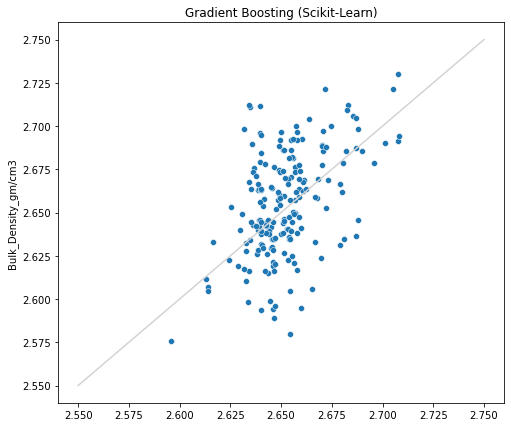

In [475]:
# Training model
model_gb = GradientBoostingRegressor(
    n_estimators = 100, 
    max_depth = 3, 
    random_state = 1,
    max_features = "auto"
).fit(train[features], train[target])

# Metrics
print("Train Data")
print(regression_metrics(model_gb, train))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_gb, test))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.plot((2.55,2.75), (2.55,2.75), color = "lightgray")
sns.scatterplot(model_gb.predict(test[features]), test[target])
plt.title("Gradient Boosting (Scikit-Learn)");

In [476]:
gb_imp = pd.DataFrame(model_gb.feature_importances_,index = features, columns = ["imp"])
gb_imp.sort_values("imp", ascending = False)

imp
PE   0.425559
RT90 0.344448
GR   0.229993

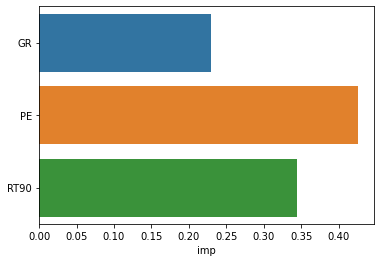

In [477]:
#plt.figure(figsize = (10,8))
sns.barplot(y= gb_imp.index, x = gb_imp.imp);

## Gradient Boosting (XGBoost)

Now the XGBoost implementation of Gradient Boosting:

Train Data
            Values
R2 Score  0.855759
MSE       0.000123
Exp. Var. 0.855761
--------------------
Test Data
            Values
R2 Score  0.231652
MSE       0.000706
Exp. Var. 0.233793
--------------------


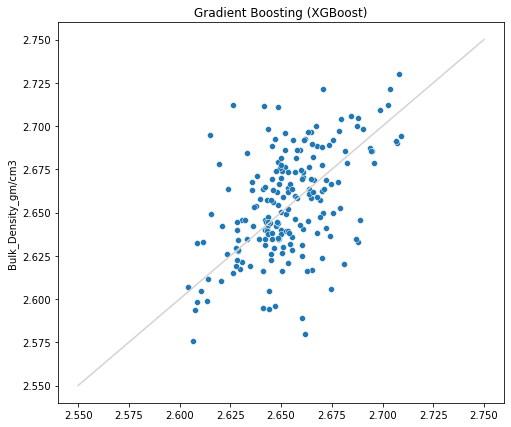

In [478]:
# Training model
model_xgb = XGBRegressor(
    n_estimators = 100, 
    max_depth = 5,
    reg_lambda = 10,
    tree_method = "hist",
    random_state = 1,
    enable_categorical = False
).fit(train[features], train[target])

# Metrics
print("Train Data")
print(regression_metrics(model_xgb, train))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_xgb, test))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.plot((2.55,2.75), (2.55,2.75), color = "lightgray")
sns.scatterplot(model_xgb.predict(test[features]), test[target])
plt.title("Gradient Boosting (XGBoost)")
plt.show()

In [479]:
imp = pd.DataFrame(model_xgb.feature_importances_,index = features, columns = ["imp"])
imp.sort_values("imp", ascending = False)

imp
RT90 0.367243
PE   0.346392
GR   0.286365

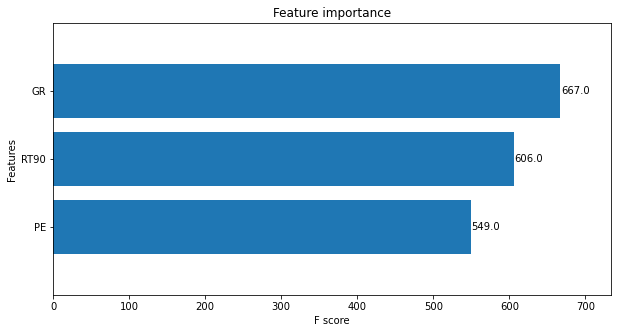

In [480]:
fig, ax = plt.subplots(1,1,figsize = (10,5))
plot_importance(model_xgb, height = 0.8, ax = ax, grid = False);

## Neural Networks

Now let's try a non-linear model to predict the price of the houses:

Train Data
            Values
R2 Score  0.442974
MSE       0.000474
Exp. Var. 0.444542
--------------------
Test Data
            Values
R2 Score  0.279281
MSE       0.000662
Exp. Var. 0.279281
--------------------


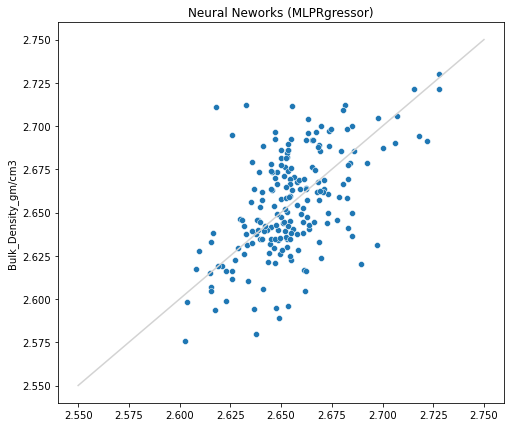

In [481]:
model_nn = MLPRegressor(
    hidden_layer_sizes = (500, 300, 100),
    activation = "relu",
    solver = "adam",
    max_iter = 1000,
    early_stopping = True,
    n_iter_no_change = 500,
    random_state = 10
).fit(train[features], train[target])

print("Train Data")
print(regression_metrics(model_nn, train))
print(20 * "-")


print("Test Data")
print(regression_metrics(model_nn, test))
print(20 * "-")

# Plotting predictions vs true
plt.figure(figsize = (8,7))
plt.plot((2.55,2.75), (2.55,2.75), color = "lightgray")
sns.scatterplot(model_nn.predict(test[features]), test[target])
plt.title("Neural Neworks (MLPRgressor)")
plt.show()

In [80]:
model_nn.coefs_ #above code shows the feature importance in multiple layers

# Predictions

In [482]:
prediction = pd.DataFrame(model_nn.predict(data[features]), columns = ["NN_pred_Density"])
prediction

NN_pred_Density
0            2.648032
1            2.655476
2            2.650724
3            2.648759
4            2.645029
...               ...
1106         2.683852
1107         2.680690
1108         2.673966
1109         2.667535
1110         2.666896

[1111 rows x 1 columns]

In [483]:
data["NN_predicted_Density"] = model_nn.predict(data[features])
data

index     DEPT     CALI       BS  hole enlarged       GR     NPHS  \
0    0.000000 0.000000 0.769413 0.000000       0.770624 0.444861 0.358891   
1    0.000901 0.000901 0.764361 0.000000       0.764588 0.430721 0.327896   
2    0.001802 0.001802 0.744797 0.000000       0.744467 0.379298 0.287113   
3    0.002703 0.002703 0.752586 0.000000       0.752515 0.391080 0.292007   
4    0.003604 0.003604 0.710177 0.000000       0.710262 0.416279 0.265905   
...       ...      ...      ...      ...            ...      ...      ...   
1106 0.996396 0.996396 0.366612 0.000000       0.366197 0.580095 0.765090   
1107 0.997297 0.997297 0.382452 0.000000       0.382294 0.630914 0.781403   
1108 0.998198 0.998198 0.395113 0.000000       0.396378 0.641368 0.787928   
1109 0.999099 0.999099 0.388632 0.000000       0.388330 0.607771 0.750408   
1110 1.000000 1.000000 0.379333 0.000000       0.380282 0.562088 0.761827   

           PE     RT20     RT30     RT60     RT90      RXO     RT10  \
0    0.374152 0.108526 0.115496 0.110883 0.101126 0.084104 0.098028   
1    0.308401 0.123140 0.130822 0.125677 0.114432 0.095453 0.111245   
2    0.311445 0.168347 0.178159 0.171398 0.155608 0.130666 0.152254   
3    0.355366 0.193465 0.204356 0.196831 0.178590 0.150172 0.174970   
4    0.389807 0.215623 0.227393 0.219409 0.199083 0.167236 0.194843   
...       ...      ...      ...      ...      ...      ...      ...   
1106 0.757349 0.472908 0.475076 0.448857 0.432154 0.401771 0.466629   
1107 0.720560 0.465545 0.468057 0.442076 0.425174 0.394912 0.458958   
1108 0.692468 0.461129 0.463812 0.437959 0.420947 0.391060 0.454318   
1109 0.667420 0.457724 0.460503 0.434673 0.417541 0.388199 0.450789   
1110 0.646286 0.454759 0.457476 0.431321 0.413897 0.386103 0.448076   

      RHOB (kg/m3)  NN_predicted_Density  
0              NaN              2.648032  
1              NaN              2.655476  
2              NaN              2.650724  
3              NaN              2.648759  
4              NaN              2.645029  
...            ...                   ...  
1106      0.510265              2.683852  
1107      0.537345              2.680690  
1108      0.513917              2.673966  
1109      0.471221              2.667535  
1110      0.427056              2.666896  

[1111 rows x 16 columns]

In [484]:
data_final = pd.read_csv("xyz_U_montney well.csv")
data_final["Bulk_Density_gm/cm3"] = 0.001 * data_final["RHOB (kg/m3)"]
data_final["NN_predicted_Density"] = model_nn.predict(data[features])
data_final

DEPT       CALI   BS  hole enlarged         GR     NPHS       PE  \
0    3039.000000 223.705200  222       1.710000  89.603400 0.077000 3.091800   
1    3039.100000 223.680100  222       1.680000  88.689900 0.075100 3.016200   
2    3039.200000 223.582900  222       1.580000  85.367800 0.072600 3.019700   
3    3039.300000 223.621600  222       1.620000  86.129000 0.072900 3.070200   
4    3039.400000 223.410900  222       1.410000  87.756900 0.071300 3.109800   
...          ...        ...  ...            ...        ...      ...      ...   
1106 3149.600000 221.704000  222      -0.300000  98.340000 0.101900 3.532400   
1107 3149.700000 221.782700  222      -0.220000 101.623100 0.102900 3.490100   
1108 3149.800000 221.845600  222      -0.150000 102.298500 0.103300 3.457800   
1109 3149.900000 221.813400  222      -0.190000 100.128000 0.101000 3.429000   
1110 3150.000000 221.767200  222      -0.230000  97.176700 0.101700 3.404700   

          RT20      RT30      RT60      RT90        RXO       RT10  \
0    29.338100 29.176900 28.890000 28.870800  29.807200  29.807200   
1    31.860100 31.654400 31.337200 31.318600  32.348500  32.348500   
2    39.661800 39.306500 38.900500 38.893900  40.233000  40.233000   
3    43.996600 43.541200 43.107700 43.122000  44.600600  44.600600   
4    47.820500 47.265200 46.842500 46.892100  48.421600  48.421600   
...        ...       ...       ...       ...        ...        ...   
1106 92.221800 87.303500 84.798200 89.770600 100.936700 100.676900   
1107 90.951100 86.168900 83.676500 88.486500  99.401000  99.202000   
1108 90.189000 85.482600 82.995400 87.708800  98.538400  98.310000   
1109 89.601500 84.947800 82.451800 87.082200  97.897800  97.631400   
1110 89.089700 84.458400 81.897400 86.411900  97.428400  97.109800   

      RHOB (kg/m3)  Bulk_Density_gm/cm3  NN_predicted_Density  
0              NaN                  NaN              2.648032  
1              NaN                  NaN              2.655476  
2              NaN                  NaN              2.650724  
3              NaN                  NaN              2.648759  
4              NaN                  NaN              2.645029  
...            ...                  ...                   ...  
1106   2652.647000             2.652647              2.683852  
1107   2656.942900             2.656943              2.680690  
1108   2653.226300             2.653226              2.673966  
1109   2646.453100             2.646453              2.667535  
1110   2639.446800             2.639447              2.666896  

[1111 rows x 16 columns]

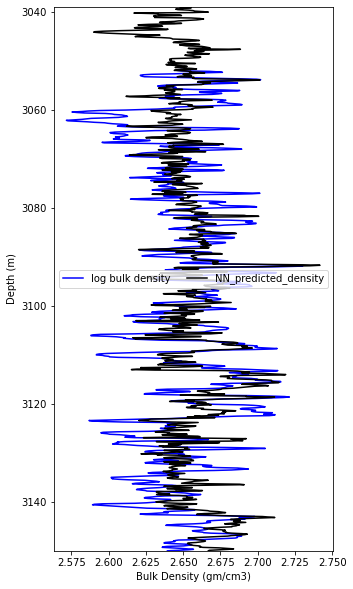

In [485]:
plt.figure(figsize=(5, 10))
plt.xlabel("Bulk Density (gm/cm3)")
plt.ylabel("Depth (m)")
plt.plot(data_final['Bulk_Density_gm/cm3'], data_final['DEPT'], 'b-', label='log bulk density')
plt.plot(data_final['NN_predicted_Density'], data_final['DEPT'], 'k-', label='NN_predicted_density')
plt.ylim(max(data_final['DEPT']), min(data_final['DEPT']))
plt.legend(loc="right", mode = "expand", ncol = 3);

# Summary
Neural Networks showed less overfitting as compare to the gradient boost and XGboost.